# Math 753/853 HW5: Least-squares fits to models

### Problem 1. Polynomial least-squares fit

**(a)** Fit a cubic polynomial to the following data, and make a plot that shows the data as dots and the cubic fit as a smooth curve.

In [36]:
xdata = [-1.0  -0.8  -0.6  -0.4  -0.2  0.0  0.2  0.4  0.6  0.8  1.0];
ydata = [3.41  3.19  2.57  2.44  1.90 1.66 1.17 1.46 1.07 1.44 2.28];

b = ydata'

A = ones(11, 4)
A[:,2] = xdata'
A[:,3] = (xdata').^2
A[:,4] = (xdata').^3

Q,R = qr(A)

c = R\((Q')*b)

4x1 Array{Float64,2}:
  1.56576
 -1.63415
  1.2197 
  1.02855

**(b)** Write out the polynomial in the form $P(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3$ with the coefficients specified as numeric values with three digits. 

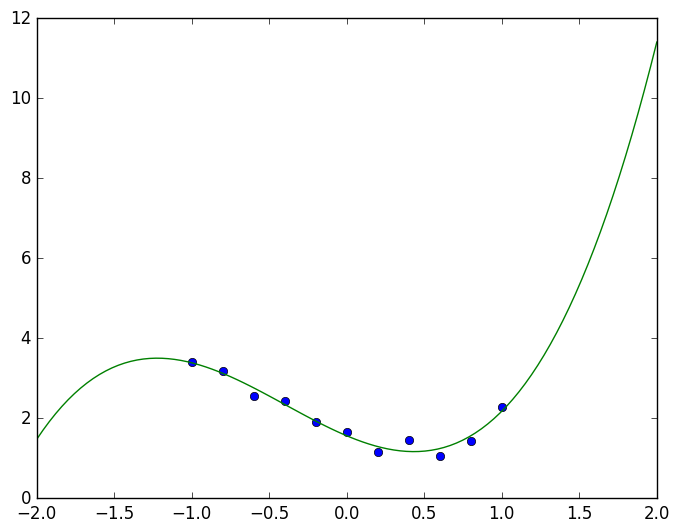

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002AA31860>

In [38]:
#P(x) = c[1] + c[2]x + c[3]x.^2 + c[4]x.^3
P(x) = 1.566 - 1.634x + 1.220x.^2 + 1.029x.^3

using PyPlot

plot(xdata,ydata,"bo")
x = linspace(-2,2,100)
plot(x,P(x),"g-")

### Problem 2. Exponential fit

**(a)** Given the following experimental measurements of alpha-particle emission of a radioactive substance, fit an exponential function $y = c \exp(a t)$ to the data using least squares. Make a plot that shows the data as dots and the exponential fit as a smooth curve. What are the values of $c$ and $a$?

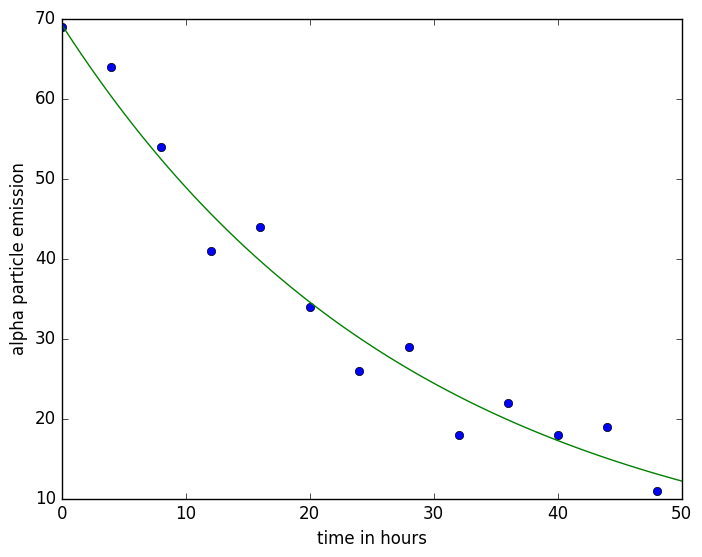

The value of a is -0.03475031092464803
The value of c is 69.23564314813459


In [68]:
tdata = [0 4 8 12 16 20 24 28 32 36 40 44 48]; # time in hours
ydata = [69 64 54 41 44 34 26 29 18 22 18 19 11]; # alpha particle emission rate

plot(tdata,ydata,"bo")
xlabel("time in hours")
ylabel("alpha particle emission")

A = ones(13,2)
A[:,2] = tdata
b = log(ydata)
x = A\b'
c = exp(x[1])
a = x[2]

f(x) = c.*exp(a.*x)

x = linspace(0,50,100)
plot(x,f(x),"g-")

print("The value of a is ")
println(a)
print("The value of c is ")
println(c)

**(b)** What is the substance's half-life?  (i.e. the time $t$ for which $y(t)/y(0) = 1/2$)

In [69]:
print("Half Life is ")
print(log((f(0)*.5)/c1)/c2)#About 19.9465
println(" hours")
f(19.9465)/f(0) #Checks is about 1/2

Half Life is 19.946502984187784 hours


0.5000000518507294

### Problem 3. Power-law fit

**(a)** Fit a power-law curve $y = c t^a$ to the following data, and make a plot showing the datapoints as dots and the fit as a smooth curve.

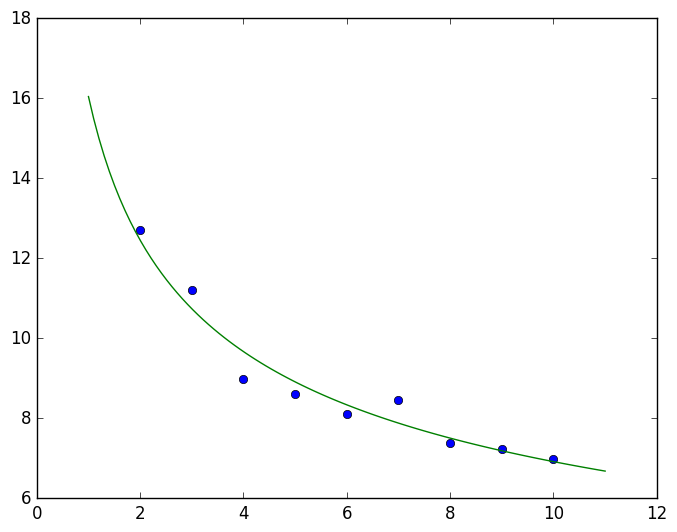

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003612CC88>

In [147]:
tdata =  [2 3 4 5 6 7 8 9 10]; 
ydata =  [12.7 11.2 8.99 8.62 8.12 8.47 7.39 7.24 6.99];

plot(tdata,ydata,"bo")

A = ones(9,2)
A[:,2] = log(tdata)
b = log(ydata)
x = A\b'
c = exp(x[1])
a = x[2]

f(x) = c*x.^a
x = linspace(1,11,100)
plot(x,f(x),"g-")

**(b)** Write out the least-squares power-law fit $y = c x t^a$ with $c$ and $a$ specified as numeric values with three digits. 

In [148]:
y(t) = 16.047*t.^(-0.365)

y (generic function with 1 method)

### Problem 4. c t exp(at) fit

**(a)** The following data represent measurements of blood concentration of a drug after intravenous injection as a function of time. Fit a function of the form $y = c \, t \, e^{at}$ to the data using least squares. Make a plot that shows the data as dots and the exponential fit as a smooth curve. 

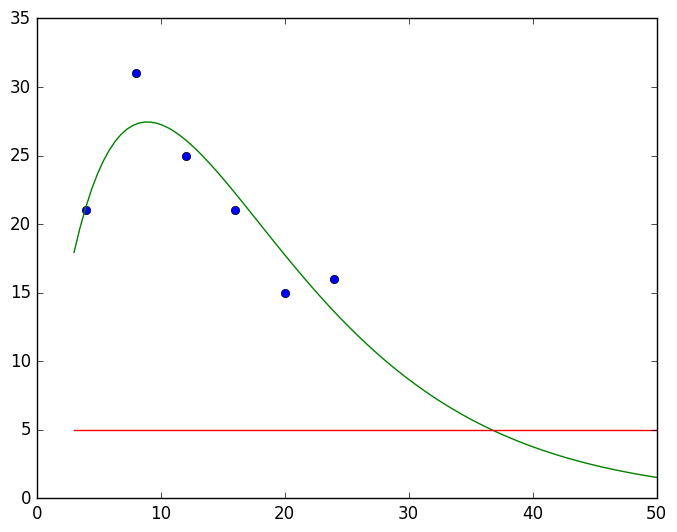

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000035630E80>

In [121]:
tdata = [4   8  12  16  20  24]; # time in hours
ydata = [21 31  25  21  15  16]; # concentration in ng/ml

plot(tdata,ydata,"bo")

b = log(ydata./tdata)
A = ones(6,2)
A[:,2] = tdata
x = A\b'
c = exp(x[1])
a = x[2]

f(t) = c*t.*exp(a*t)
t = linspace(3,50,100)
plot(t,f(t),"g-")

line = 5.*ones(t)
plot(t,line,"r-")

**(b)** Write out the model $y = c \, t \, e^{at}$ with numeric values specified to three digits. 

In [133]:
y(x) = 8.373*x.*exp(-0.112*x)

y (generic function with 1 method)

**(c)** Based on the model, at what time do you expect the concentration to reach 5 ng/ml?

In [140]:
y(x) = -5 + 8.373*x.*exp(-0.112*x) #Find this at y(x) = 0

#use bisectsearch to find an accurate value
function bisectsearch(f,a,b, diagnostics = false)
    #check [a,b] is an interval where f(a)f(b) < 0
    if(f(a) * f(b) >= 0)
        println("This interval is not valid")
    else
        
        #Make sure that f(a) is negative
        if(f(a) > 0)
            k = a
            a = b
            b = k
        end
        
        #Make sure that if a or b are integers, make them into Float64 so next conditional statement will work correctly
        a = float(a)
        b = float(b)
        
        #Makes a and b the highest type of the two
        if(!isa(a,typeof(b)))
            promote(a,b)
        end
        
        #let the number of steps bound our epsilon 
        n = -1 #define n in this scope
        if(isa(a,Float64))
            n = round(log2((abs(b - a)) * 10^(16)) - 1)
        elseif(isa(a,Float32))
            n = round(log2((abs(b - a)) * 10^(7)) - 1)
        elseif(isa(a,Float16))
            n = round(log2((abs(b - a)) * 10^(4)) - 1)
        else
            n = round(log2((abs(b - a)) * 10^(38)) - 1)
        end

        c = (b + a) / 2 #Define c
        while(n >= 0)
            if diagnostics
                fc = f(c)
                println("$(c),    $(fc)")
            end
            if(f(c) < 0)
                a = c
            else 
                b = c
            end
            c = (b + a) / 2
            n = n - 1
        end
        return c
    end
end

p = bisectsearch(y,35,40, false)

print("The time in which the concentration will be at 5 ng/ml is ")
println(p)

The time in which the concentration will be at 5 ng/ml is 36.79377740558874
